In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st

In [45]:
df = pd.read_excel('RETURN.xlsx')
df

,No,Returns
0,1,NaN
1,2,0.001129
2,3,0.000000
3,4,-0.001129
4,5,0.000000
...,...,...
209,210,0.001053
210,211,0.000000
211,212,0.000000
212,213,0.001052


In [46]:
ret = df['Returns']
ret

0           NaN
1      0.001129
2      0.000000
3     -0.001129
4      0.000000
         ...   
209    0.001053
210    0.000000
211    0.000000
212    0.001052
213    0.000000
Name: Returns, Length: 214, dtype: float64

In [47]:
df = df.copy()
df = df.dropna()
df

,No,Returns
1,2,0.001129
2,3,0.000000
3,4,-0.001129
4,5,0.000000
5,6,0.000000
...,...,...
209,210,0.001053
210,211,0.000000
211,212,0.000000
212,213,0.001052


In [6]:
adfuller(df['Returns'])

(-15.142509329009446,
 6.978451877526678e-28,
 0,
 212,
 {'1%': -3.4615775784078466,
  '5%': -2.875271898983725,
  '10%': -2.5740891037735847},
 -2015.5966047252032)

H<sub>0 = data is not stationary

H<sub>1 = data is stationary

pval = 6.978e-28
pval less than alpha 0.05 -> Reject H<sub>0

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

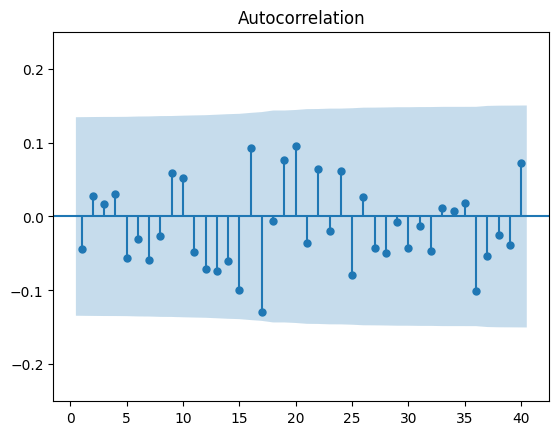

In [8]:
plot_acf(df['Returns'],zero=False, lags= 40)
plt.ylim(-0.25,0.25)
plt.show()

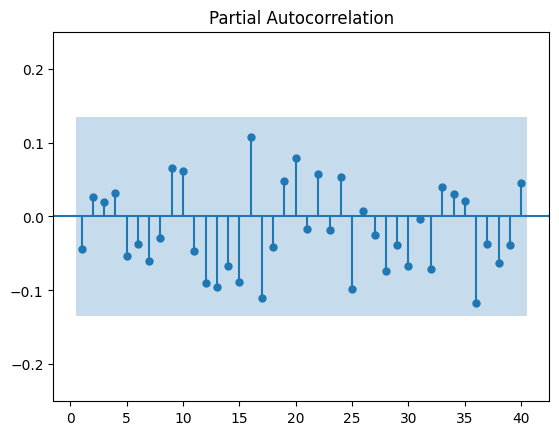

In [9]:
plot_pacf(df['Returns'],zero=False, lags= 40)
plt.ylim(-0.25,0.25)
plt.show()

# ARIMA (1,0,1)

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
model1 = ARIMA(df['Returns'], order = (1,0,1))
model1_fit = model1.fit()
print(model1_fit.summary())

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  213
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1090.027
Date:                Wed, 15 Nov 2023   AIC                          -2172.054
Time:                        19:13:45   BIC                          -2158.609
Sample:                             0   HQIC                         -2166.620
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      3.163      0.002       0.000       0.001
ar.L1         -0.3354      1.729     -0.194      0.846      -3.724       3.053
ma.L1          0.2922      1.741      0.168      0.8

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Ljung-box test

H<sub>0 = residual are independent

H<sub>1 = residual not independent

In [12]:
res_1 = pd.DataFrame(model1_fit.resid)
sm.stats.acorr_ljungbox(res_1, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,1.000408,0.962533


normality test of residual

H<sub>0 = residual normal

H<sub>1 = residual not normal

In [13]:
from scipy.stats import shapiro

In [14]:
print(shapiro(res_1))

ShapiroResult(statistic=0.868553102016449, pvalue=1.3175818942834372e-12)


In [15]:
model2 = ARIMA(df['Returns'], order = (1,0,0))
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  213
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1089.979
Date:                Wed, 15 Nov 2023   AIC                          -2173.959
Time:                        19:13:52   BIC                          -2163.875
Sample:                             0   HQIC                         -2169.884
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      3.197      0.001       0.000       0.001
ar.L1         -0.0434      0.060     -0.718      0.473      -0.162       0.075
sigma2      2.102e-06   1.51e-07     13.883      0.0

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
res_2 = pd.DataFrame(model2_fit.resid)
sm.stats.acorr_ljungbox(res_2, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,1.11053,0.953167


In [17]:
shapiro(res_2)

ShapiroResult(statistic=0.866817831993103, pvalue=1.0612013654973107e-12)

In [18]:
model3 = ARIMA(df['Returns'], order = (0,0,1))
model3_fit = model3.fit()
print(model3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  213
Model:                 ARIMA(0, 0, 1)   Log Likelihood                1089.967
Date:                Wed, 15 Nov 2023   AIC                          -2173.935
Time:                        19:14:04   BIC                          -2163.851
Sample:                             0   HQIC                         -2169.859
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      3.205      0.001       0.000       0.001
ma.L1         -0.0432      0.060     -0.714      0.475      -0.162       0.075
sigma2      2.095e-06    1.5e-07     14.006      0.0

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
res_3 = pd.DataFrame(model3_fit.resid)
sm.stats.acorr_ljungbox(res_3, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,1.134785,0.950979


In [20]:
shapiro(res_3)

ShapiroResult(statistic=0.8668777942657471, pvalue=1.0691358822562114e-12)

heteroschedasticity test with ARIMA(1,0,1)

H<sub>0 = Homoscedasticity exists

H<sub>1 = Heteroscedasticity exists

In [21]:
model1_fit.test_heteroskedasticity(method = None, use_f=False)

array([[1.57084676, 0.00304406]])